In [1]:
# The term you are looking for to find the best choice of parameters when you have data values:
# supervised dimensionality reduction

%pylab inline
#%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import scipy.interpolate as interpolate
import scipy.integrate as integrate
import scipy.optimize as optimize

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib
matplotlib.__version__

'2.0.0rc1'

In [32]:
sys.path.insert(0, '../src')

import waveform as wave
import waveformset as ws
import trainingset as train
import taylorf2 as f2
import gaussianprocessregression as gpr
import designofexperiment as doe
#import pycbcwaveform as pycbcwave
import lalwaveform
import plotparams
import greedy
import empiricalinterpolation as eim
import surrogate
import diagnostics

import imp
imp.reload(wave)
imp.reload(ws)
imp.reload(train)
imp.reload(f2)
imp.reload(gpr)
imp.reload(doe)
#imp.reload(pycbcwave)
imp.reload(lalwaveform)
imp.reload(greedy)
imp.reload(eim)
imp.reload(surrogate)
imp.reload(diagnostics)

import constants
imp.reload(constants)
from constants import *

# Get saved training-set waveforms

In [4]:
# trainset = ws.HDF5WaveformSet('../data/flowp00015/dh_training_set_lhd.hdf5')

trainset = ws.HDF5WaveformSet('../data/flowp00015/dh_training_set_lhd_uncsamp.hdf5')
Bamp_filename = '../data/flowp00015/Bamp_lhd_uncsamp.hdf5'
Bphase_filename = '../data/flowp00015/Bphase_lhd_uncsamp.hdf5'
amp_gp_filename = '../data/flowp00015/amp_gp_lhd_uncsamp.hdf5'
phase_gp_filename = '../data/flowp00015/phase_gp_lhd_uncsamp.hdf5'

360


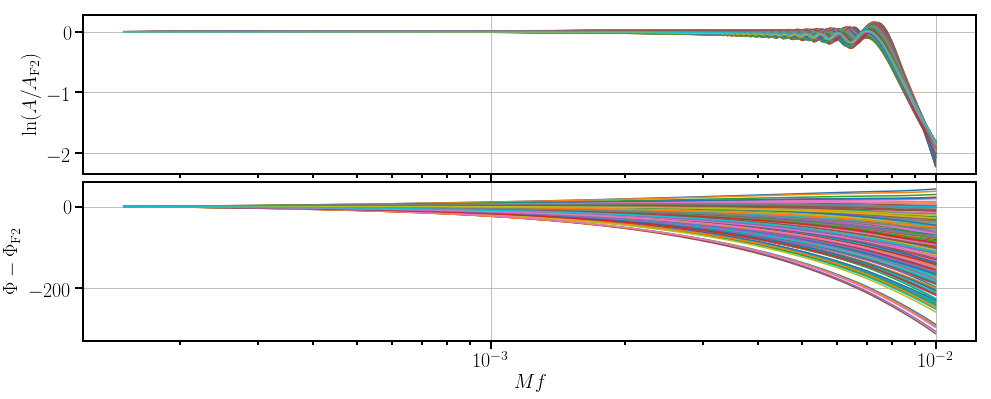

In [5]:
print len(trainset)

fig, (ax1, ax2) = wave.plot_waveforms_fd([trainset[i] for i in range(0, len(trainset), 1)])
ax1.set_ylabel(r'$\ln(A/A_{\rm F2})$')
ax2.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

# Generate reduced Bases for amplitude and phase

In [6]:
epsilon = 1.0e-7

# Initialize the ReducedBasis object
add = surrogate.add_amp
subtract = surrogate.subtract_amp
scalar_multiply = surrogate.scalar_multiply_amp
inner_product = surrogate.inner_product_amp

get_waveform = trainset.get_waveform

ts_params = trainset.parameters()
rbamprun = greedy.ReducedBasis(add, subtract, scalar_multiply, inner_product, get_waveform, ts_params)

# Standard method
rbamprun.generate_reduced_basis(epsilon, ts_istart=0, Nbases=None)

1.0
0.0452128614297
0.00694435680942
0.00508494775753
0.00122086056004
0.000995443163874
0.00059383020483
0.000265655751623
0.000187910792445
0.00011213688358
9.1133936599e-05
7.72558728344e-05
4.47542013657e-05
4.04566211522e-05
2.98567284291e-05
2.36381015106e-05
1.55270042042e-05
1.28308094807e-05
1.11631665414e-05
9.00116417835e-06
6.25089162198e-06
5.00753452892e-06
4.66488627537e-06
4.32408821871e-06
4.17542867592e-06
4.16518744262e-06
2.61059363693e-06
2.26039959761e-06
1.60744306554e-06
1.52253764962e-06
1.48422577328e-06
1.09801879267e-06
9.20165027951e-07
7.98863012852e-07
7.35941748653e-07
6.75501779845e-07
6.19810020863e-07
5.37494864394e-07
5.30992574244e-07
5.16916496718e-07
4.44242223119e-07
4.28844853184e-07
4.02740074845e-07
4.00982106741e-07
3.06012017615e-07
2.90582801377e-07
2.56114074282e-07
2.43405489986e-07
2.37706296313e-07
2.18055788204e-07
2.05231159622e-07
2.00821335783e-07
1.83266925635e-07
1.77108854804e-07
1.72436547041e-07
1.70954037371e-07
1.52960525135e

68


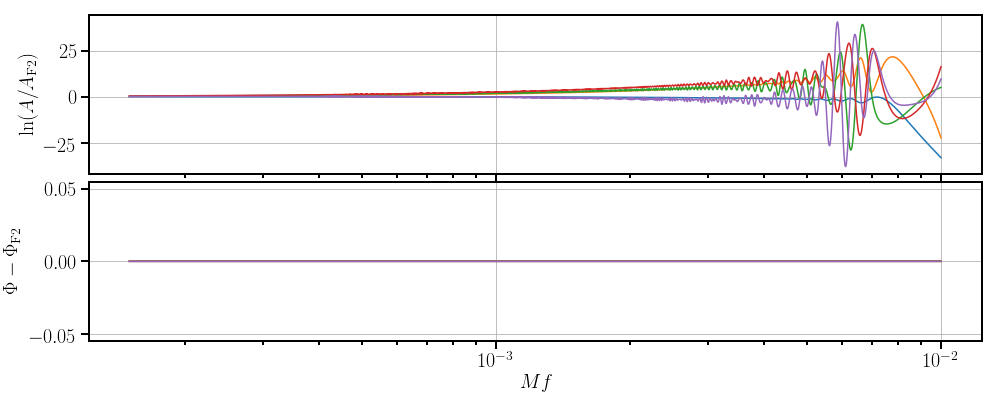

In [7]:
print len(rbamprun.rb)

fig, (ax1, ax2) = wave.plot_waveforms_fd(rbamprun.rb[:5])
ax1.set_ylabel(r'$\ln(A/A_{\rm F2})$')
ax2.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

In [8]:
epsilon = 1.0e-11

# Initialize the ReducedBasis object
add = surrogate.add_phase
subtract = surrogate.subtract_phase
scalar_multiply = surrogate.scalar_multiply_phase
inner_product = surrogate.inner_product_phase

get_waveform = trainset.get_waveform

ts_params = trainset.parameters()
rbphaserun = greedy.ReducedBasis(add, subtract, scalar_multiply, inner_product, get_waveform, ts_params)

# Standard method
rbphaserun.generate_reduced_basis(epsilon, ts_istart=0, Nbases=None)

1.0
0.999940811687
0.022489362844
0.000471320724691
6.45437395278e-05
1.48768908093e-05
4.61157168308e-06
1.54020006804e-06
4.58701639339e-07
3.72201446996e-07
2.1252700555e-07
1.74758292948e-07
1.19963057488e-07
7.64545899923e-08
5.44397313895e-08
4.33781049969e-08
2.90942514525e-08
1.87855985212e-08
1.69959236684e-08
1.0957532548e-08
9.46183331685e-09
8.15897316375e-09
5.80781267523e-09
4.95719820748e-09
4.70083494353e-09
1.11487841181e-09
9.71028035757e-10
6.99928670578e-10
5.96815374898e-10
5.20994247744e-10
3.94621335609e-10
3.39176464692e-10
2.52332044148e-10
2.10759076857e-10
2.07133421526e-10
1.73081216026e-10
1.62163504847e-10
1.50523482567e-10
1.39589562131e-10
1.34251609829e-10
1.30434218981e-10
1.15257803301e-10
1.13513309863e-10
1.08248743302e-10
9.42506073187e-11
8.86473117134e-11
8.73522365552e-11
8.62687699055e-11
8.45513659087e-11
7.87304665906e-11
7.63056284825e-11
6.739320213e-11
6.66874333533e-11
6.18468609659e-11
5.92480509098e-11
5.79306602688e-11
5.45892220316e-1

93


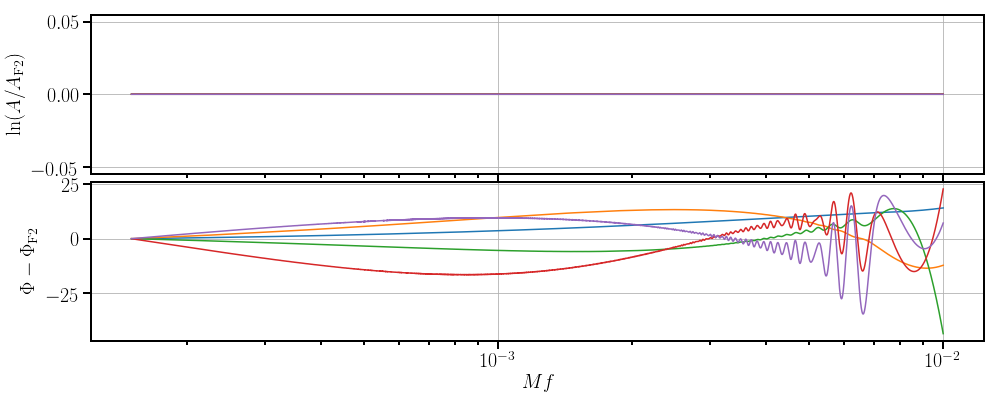

In [9]:
print len(rbphaserun.rb)

fig, (ax1, ax2) = wave.plot_waveforms_fd(rbphaserun.rb[:5])
ax1.set_ylabel(r'$\ln(A/A_{\rm F2})$')
ax2.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

# Generate Empirical interpolating functions

In [10]:
def save_empirical_interpolating_function_list(filename, b_j, mf_node):
    """Save the empirical interpolating functions as a HDF5WaveformSet object.
    The parameter value associated with each function b_j is the frequency of the node mf_j.
    
    Parameters
    ----------
    filename : string
    b_j : list of Waveform objects
        Empirical interpolating functions.
    mf_node : List of floats
        Frequency associated with each empirical interpolating function b_j.
    """
    bset = ws.HDF5WaveformSet(filename)
    
    for j in range(len(b_j)):
        # b_j don't have waveform parameters associated with them,
        # but you do want to save the node frequency node_mf 
        parameters = np.array([mf_node[j]])
        bset.set_waveform(j, b_j[j], parameters)
    
    bset.close()

In [11]:
# Use the first 20 bases
namp = 20
nphase = 20
empirical_node_indices_amp, Bamp_j = surrogate.empirical_interpolation_for_time_domain_waveform(
    rbamprun.rb[:namp], 'amp')
empirical_node_indices_phase, Bphase_j = surrogate.empirical_interpolation_for_time_domain_waveform(
    rbphaserun.rb[:nphase], 'phase')

In [12]:
# Get the frequencies Mf at each empirical node, and sort B's by the node frequency.

# amp
mf_amp = Bamp_j[0].x[empirical_node_indices_amp]
mf_Bamp_list = [[mf_amp[i], Bamp_j[i]] for i in range(len(mf_amp))]
mf_Bamp_list_sorted = sorted(mf_Bamp_list, key=lambda x: x[0])

# phase
mf_phase = Bphase_j[0].x[empirical_node_indices_phase]
mf_Bphase_list = [[mf_phase[i], Bphase_j[i]] for i in range(len(mf_phase))]
mf_Bphase_list_sorted = sorted(mf_Bphase_list, key=lambda x: x[0])

In [13]:
# Save Amplitude and phase empirical interpolants

mf = [mf_Bamp_list_sorted[i][0] for i in range(len(mf_Bamp_list_sorted))]
B_j = [mf_Bamp_list_sorted[i][1] for i in range(len(mf_Bamp_list_sorted))]
save_empirical_interpolating_function_list(Bamp_filename, B_j, mf)

mf = [mf_Bphase_list_sorted[i][0] for i in range(len(mf_Bphase_list_sorted))]
B_j = [mf_Bphase_list_sorted[i][1] for i in range(len(mf_Bphase_list_sorted))]
save_empirical_interpolating_function_list(Bphase_filename, B_j, mf)

In [14]:
# Now load them
Bamp_j = ws.HDF5WaveformSet(Bamp_filename)
Bphase_j = ws.HDF5WaveformSet(Bphase_filename)

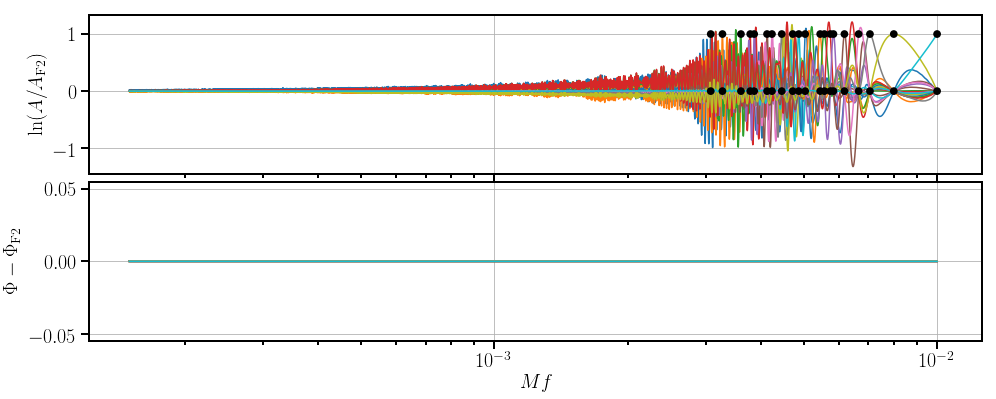

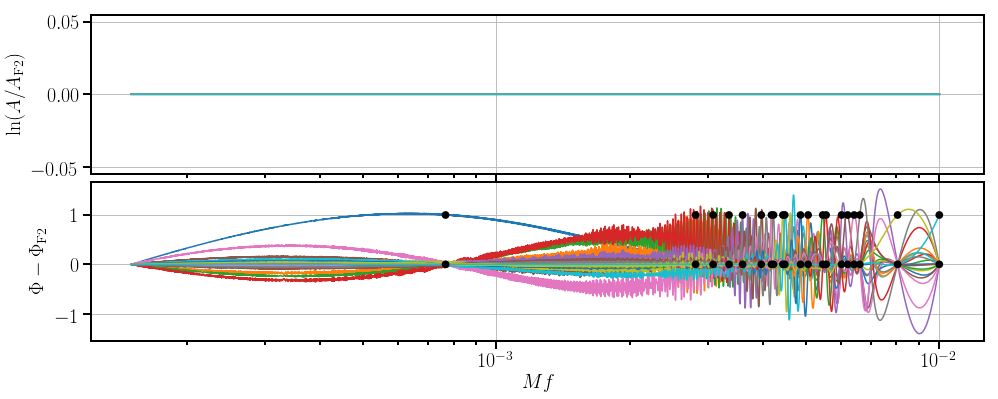

In [15]:
hs = [Bamp_j[j] for j in range(len(Bamp_j))]
mfs = np.array([Bamp_j.get_waveform(j, data='parameters')[0] for j in range(len(Bamp_j))])
fig, (ax1, ax2) = wave.plot_waveforms_fd(hs)
# zorder is order in which figure is drawn (placed on top of previous figures)
ax1.scatter(mfs, 0*mfs, marker='o', c='k', s=60, edgecolor='none', zorder=100)
ax1.scatter(mfs, 0*mfs+1, marker='o', c='k', s=60, edgecolor='none', zorder=100)

ax1.set_ylabel(r'$\ln(A/A_{\rm F2})$')
ax2.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

hs = [Bphase_j[j] for j in range(len(Bphase_j))]
mfs = np.array([Bphase_j.get_waveform(j, data='parameters')[0] for j in range(len(Bphase_j))])
fig, (ax1, ax2) = wave.plot_waveforms_fd(hs)
# zorder is order in which figure is drawn (placed on top of previous figures)
ax2.scatter(mfs, 0*mfs, marker='o', c='k', s=60, edgecolor='none', zorder=100)
ax2.scatter(mfs, 0*mfs+1, marker='o', c='k', s=60, edgecolor='none', zorder=100)

ax1.set_ylabel(r'$\ln(A/A_{\rm F2})$')
ax2.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

# Generate Gaussian processes

In [16]:
# Calculate the amplitude for all waveforms in the training set
# at the amplitude empirical nodes
damp_ts_list = []
for j in range(len(Bamp_j)):
    mf = Bamp_j.get_waveform(j, data='parameters')[0]
    damp_ts = np.array([trainset[i].interpolate('amp')(mf) for i in range(len(trainset))])
    damp_ts_list.append(damp_ts)
    
# Calculate the phase for all waveforms in the training set
# at the phase empirical nodes
dphase_ts_list = []
for j in range(len(Bphase_j)):
    mf = Bphase_j.get_waveform(j, data='parameters')[0]
    dphase_ts = np.array([trainset[i].interpolate('phase')(mf) for i in range(len(trainset))])
    dphase_ts_list.append(dphase_ts)
    
# Relevant parameters for the training set waveforms
params_ts = trainset.parameters()

In [25]:
#print dphase_ts_list[-1]

In [26]:
limits = np.array([[1.0/3.0, 1.0], [-0.7, 0.7], [-0.7, 0.7], [0, 10000], [0, 10000]])
kernel_type = 'matern52'

damp_gp_list = []
for i in range(len(damp_ts_list)):
    print i
    points = params_ts
    data = damp_ts_list[i]
    hp0, hyper_limits = gpr.reasonable_hyperparameters_range(data, limits)
    damp_gp = gpr.generate_gp(points, data, hp0, kernel_type=kernel_type, 
                                hyper_limits=hyper_limits, n_restarts_optimizer=9)
    
    print gpr.get_hyperparameters(damp_gp)
    damp_gp_list.append(damp_gp)

0
[  3.05082728e-02   1.46777690e+00   3.49208325e+00   5.60000000e+00
   4.00000000e+04   4.00000000e+04   1.36156901e-03]
1
[  3.61186891e-02   1.52929140e+00   3.96071588e+00   5.60000000e+00
   4.00000000e+04   4.00000000e+04   1.82505530e-03]
2
[  3.72942967e-02   1.14931068e+00   3.41651276e+00   5.60000000e+00
   4.00000000e+04   4.00000000e+04   3.02747185e-03]
3
[  3.39991568e-02   1.27157394e+00   2.90689189e+00   4.65246137e+00
   4.00000000e+04   4.00000000e+04   3.52231265e-03]
4
[  5.32661099e-02   1.66563561e+00   3.68052751e+00   5.60000000e+00
   4.00000000e+04   4.00000000e+04   4.06669131e-03]
5
[  5.14456467e-02   1.69007657e+00   3.17903658e+00   4.24993213e+00
   4.00000000e+04   4.00000000e+04   5.19860377e-03]
6
[  3.11680837e-02   1.13804761e+00   1.09476159e+00   1.47318500e+00
   2.24910790e+04   4.00000000e+04   5.51901860e-03]
7
[  3.46923639e-02   1.11037150e+00   1.22771956e+00   1.73108649e+00
   2.36379914e+04   4.00000000e+04   6.59521155e-03]
8
[  3.0

In [33]:
limits = np.array([[1.0/3.0, 1.0], [-0.7, 0.7], [-0.7, 0.7], [0, 10000], [0, 10000]])
kernel_type = 'matern52'

dphase_gp_list = []
for i in range(len(dphase_ts_list)):
    print i
    points = params_ts
    data = dphase_ts_list[i]
    hp0, hyper_limits = gpr.reasonable_hyperparameters_range(data, limits, length_scale_factor=[0.1, 10.0], 
                                                             sigma_n_factor=[1.0e-6, 0.1])
    print hyper_limits
    dphase_gp = gpr.generate_gp(points, data, hp0, kernel_type=kernel_type, 
                                hyper_limits=hyper_limits, n_restarts_optimizer=9)
    
    print gpr.get_hyperparameters(dphase_gp)
    dphase_gp_list.append(dphase_gp)

0
[[  1.73019485e+00   6.92077941e+01]
 [  6.66666667e-02   6.66666667e+00]
 [  1.40000000e-01   1.40000000e+01]
 [  1.40000000e-01   1.40000000e+01]
 [  1.00000000e+03   1.00000000e+05]
 [  1.00000000e+03   1.00000000e+05]
 [  1.73019485e-05   1.73019485e+00]]
[  2.02430888e+01   1.48410512e+00   5.31100043e+00   1.17581759e+01
   1.00000000e+05   1.00000000e+05   1.73019485e-05]
1
[[  7.87160384e+00   3.14864154e+02]
 [  6.66666667e-02   6.66666667e+00]
 [  1.40000000e-01   1.40000000e+01]
 [  1.40000000e-01   1.40000000e+01]
 [  1.00000000e+03   1.00000000e+05]
 [  1.00000000e+03   1.00000000e+05]
 [  7.87160384e-05   7.87160384e+00]]
[  7.49674203e+01   1.39197791e+00   6.86589087e+00   1.40000000e+01
   9.82881196e+04   1.00000000e+05   7.87160384e-05]
2
[[  8.70353746e+00   3.48141498e+02]
 [  6.66666667e-02   6.66666667e+00]
 [  1.40000000e-01   1.40000000e+01]
 [  1.40000000e-01   1.40000000e+01]
 [  1.00000000e+03   1.00000000e+05]
 [  1.00000000e+03   1.00000000e+05]
 [  8.70

/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  9.26230481e-04,   5.19531591e-04,  -1.10895954e-03,
        -4.58937968e+01,  -5.63879471e-04,  -1.51802123e+02,
         1.42935614e-04]), 'nit': 35, 'funcalls': 81}
  " state: %s" % convergence_dict)


[  1.01712754e+02   1.30022552e+00   7.23811483e+00   1.40000000e+01
   8.75015099e+04   1.00000000e+05   1.30628667e-04]
10
[[  1.42723807e+01   5.70895227e+02]
 [  6.66666667e-02   6.66666667e+00]
 [  1.40000000e-01   1.40000000e+01]
 [  1.40000000e-01   1.40000000e+01]
 [  1.00000000e+03   1.00000000e+05]
 [  1.00000000e+03   1.00000000e+05]
 [  1.42723807e-04   1.42723807e+01]]
[  1.07914823e+02   1.28791493e+00   7.32841603e+00   1.40000000e+01
   8.57942086e+04   1.00000000e+05   1.42723807e-04]
11
[[  1.48953998e+01   5.95815992e+02]
 [  6.66666667e-02   6.66666667e+00]
 [  1.40000000e-01   1.40000000e+01]
 [  1.40000000e-01   1.40000000e+01]
 [  1.00000000e+03   1.00000000e+05]
 [  1.00000000e+03   1.00000000e+05]
 [  1.48953998e-04   1.48953998e+01]]
[  1.10393681e+02   1.27617902e+00   7.34518224e+00   1.40000000e+01
   8.48459459e+04   1.00000000e+05   1.48953998e-04]
12
[[  1.61716802e+01   6.46867209e+02]
 [  6.66666667e-02   6.66666667e+00]
 [  1.40000000e-01   1.40000000

In [34]:
# Save GPR functions
gpr.save_gaussian_process_regression_list(amp_gp_filename, damp_gp_list, 'matern52')
gpr.save_gaussian_process_regression_list(phase_gp_filename, dphase_gp_list, 'matern52')

# Diagnosing GP fit

In [20]:
def symlog_yticks(axes):
    decade = np.array([0.1*i for i in range(10)])
    ticks = []
    for i in range(-1, 2):
        ticks.append(decade*10**i)
    ticks = np.concatenate(np.array(ticks))
    ticks_rev = np.flip(ticks, 0)
    all_ticks = np.concatenate((-ticks_rev, ticks)) 
    axes.set_yticks(all_ticks, minor=True)
    #axes.set_yticks(all_ticks)

In [21]:
dh_testset_uni = ws.HDF5WaveformSet('../data/dh_test_set_uniform_p00015.hdf5')

[  6.00000000e-01  -7.00000000e-01   2.00000000e-01   2.00000000e+03
   1.00000000e+03]


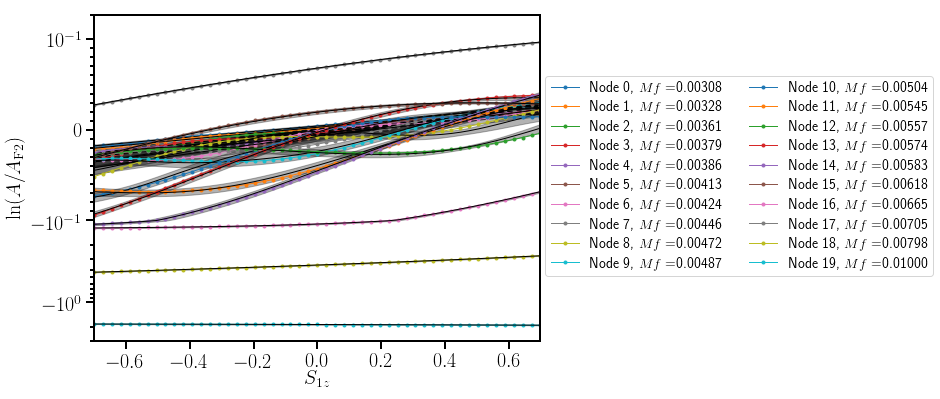

In [22]:
params_test = dh_testset_uni.parameters()
print params_test[0]

fig, axes = plt.subplots(1, figsize=(8, 6))
for j in range(len(damp_gp_list)):
    # Node frequency
    mf = Bamp_j.get_waveform(j, data='parameters')[0]
    
    # Values at node mf for test set and GP prediction/error
    damp_test = np.array([dh_testset_uni[i].interpolate('amp')(mf) for i in range(len(dh_testset_uni))])
    damp_gp = damp_gp_list[j]
    damp_gp_eval, damp_gp_eval_err = damp_gp.predict(params_test, return_std=True)
    
    axes.plot(params_test[:, 1], damp_test, 'o', ls='-', lw=1, ms=3,
             label='Node {}, $Mf=${:.5f}'.format(j, mf))
    axes.plot(params_test[:, 1], damp_gp_eval, ls='-', lw=1, c='k')
    axes.fill_between(params_test[:, 1], damp_gp_eval-damp_gp_eval_err, damp_gp_eval+damp_gp_eval_err, 
                      color='k', alpha=0.3)

axes.set_yscale('symlog', linthreshy=0.1)
#axes.set_yticks(ticks, minor=True)
symlog_yticks(axes)
axes.set_ylim(-3, 0.2)
axes.set_xlim(-0.7, 0.7)
axes.set_ylim()
axes.set_ylabel(r'$\ln(A/A_{\rm F2})$')
axes.set_xlabel(r'$S_{1z}$')
axes.legend(loc=(1.01, 0.2), ncol=2)

[  6.00000000e-01  -7.00000000e-01   2.00000000e-01   2.00000000e+03
   1.00000000e+03]


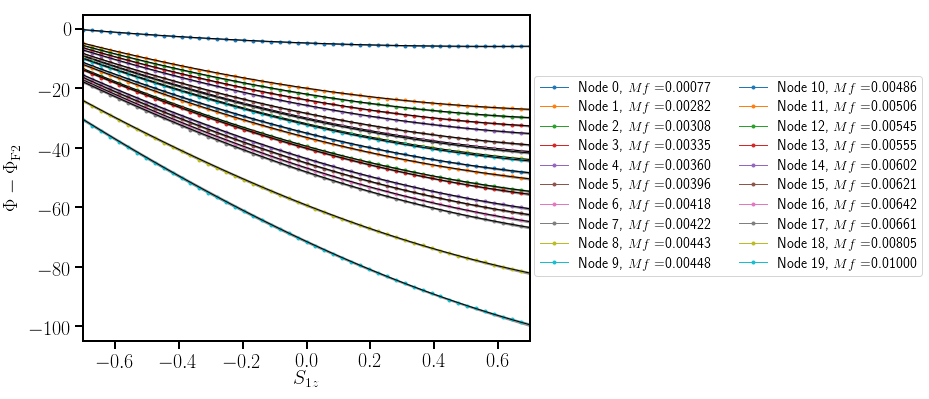

In [23]:
params_test = dh_testset_uni.parameters()
print params_test[0]

fig, axes = plt.subplots(1, figsize=(8, 6))
for j in range(len(dphase_gp_list)):
    # Node frequency
    mf = Bphase_j.get_waveform(j, data='parameters')[0]
    
    # Values at node mf for test set and GP prediction/error
    dphase_test = np.array([dh_testset_uni[i].interpolate('phase')(mf) for i in range(len(dh_testset_uni))])
    dphase_gp = dphase_gp_list[j]
    dphase_gp_eval, dphase_gp_eval_err = dphase_gp.predict(params_test, return_std=True)
    
    axes.plot(params_test[:, 1], dphase_test, 'o', ls='-', lw=1, ms=3,
             label='Node {}, $Mf=${:.5f}'.format(j, mf))
    axes.plot(params_test[:, 1], dphase_gp_eval, ls='-', lw=1, c='k')
    axes.fill_between(params_test[:, 1], dphase_gp_eval-dphase_gp_eval_err, dphase_gp_eval+dphase_gp_eval_err, 
                      color='k', alpha=0.3)

axes.set_xlim(-0.7, 0.7)
axes.set_ylim()
axes.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
axes.set_xlabel(r'$S_{1z}$')
axes.legend(loc=(1.01, 0.2), ncol=2)

# Diagnostics (Everything below should go in separate notebooks)

# Plot frequency dependent error estimates

In [167]:
# Bamp_filename = '../data/Bamp.hdf5'
# Bphase_filename = '../data/Bphase.hdf5'
# damp_gp_filename = '../data/amp_gp.hdf5'
# dphase_gp_filename = '../data/phase_gp.hdf5'

# Bamp = ws.HDF5WaveformSet(Bamp_filename)
# Bphase = ws.HDF5WaveformSet(Bphase_filename)
# damp_gp_list = gpr.load_gaussian_process_regression_list(damp_gp_filename)
# dphase_gp_list = gpr.load_gaussian_process_regression_list(dphase_gp_filename)

In [168]:
def error_of_frequency(point, B_j, gp_list, data='amp'):
    jmax = len(B_j)
    eps_f_j = np.array([gp_list[j].predict(np.atleast_2d(point), return_std=True)[1][0] 
                        for j in range(jmax)])
    
    # Get complex version of B_j's in array form
    if data=='amp':
        B_j_array = np.array([B_j[j].amp for j in range(jmax)])
    elif data=='phase':
        B_j_array = np.array([B_j[j].phase for j in range(jmax)])
    else:
        raise Exception

    # Evaluate waveform
    error_arr = np.dot(eps_f_j, B_j_array)

    # Rewrite as TimeDomainWaveform
    xarr = B_j[0].x
    return xarr, error_arr

In [177]:
point = np.array([0.8, 0.3, 0.7, 3455, 2579])
f, eps = error_of_frequency(point, Bamp, damp_gp_list, data='amp')
#f, eps = error_of_frequency(point, Bphase, dphase_gp_list, data='phase')

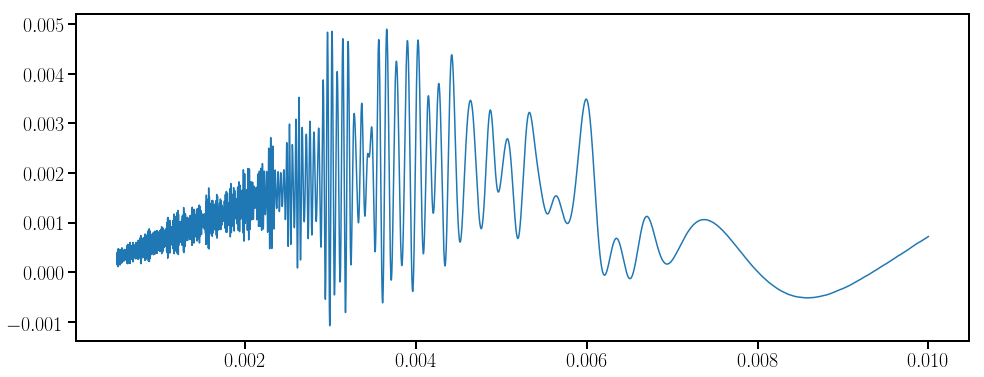

In [178]:
fig, ax1 = plt.subplots(1, figsize=(16, 6))
ax1.plot(f, eps)
#ax1.set_xscale('log')
#ax1.set_xlim(1.0e-4, 0.1)

0.00304761357728


/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/lackey/Library/Python/2.7/lib/python/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


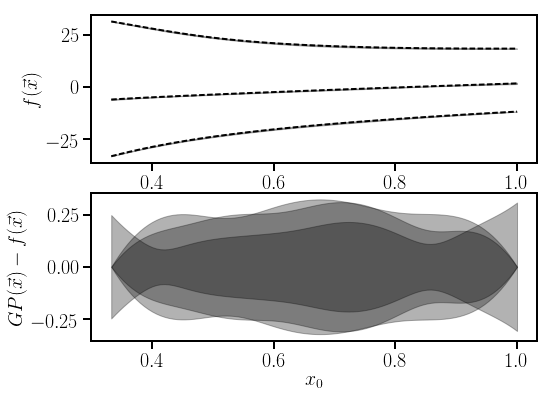

In [184]:
#x2, x3, x4 = 0.0, 2000.0, 2000.0
#x0, x1, x2, x3, x4 = params_rand[i_phasemax]
x0, x1, x2, x3, x4 = 1.0/3.0, -0.7, -0.7, 0.0, 0.0
i = 2
mf = Bphase_j.get_waveform(i, data='parameters')[0]
print mf
gp = dphase_gp_list[i]

fig, ax = plt.subplots(2, figsize=(8, 6))
for x1 in np.linspace(-0.7, 0.7, 3):
    x0s = np.linspace(1.0/3.0, 1.0, 100)
    ps = np.array([[x0, x1, x2, x3, x4] for x0 in x0s])
    
    #true = np.array([func(p) for p in ps])
    #ax[0].plot(xs, true, label=r'$x_1$='+str(x1))
    
    y_pred, ysigma = gp.predict(ps, return_std=True)
    ax[0].plot(x0s, y_pred, c='k', ls='--', lw=2)
    ax[0].fill_between(x0s, y_pred-ysigma, y_pred+ysigma, color='k', alpha=0.3)
    
    #ax[1].plot(x0s, (y_pred-true), label=r'$x_1$='+str(x1))
    ax[1].fill_between(x0s, -ysigma, ysigma, color='k', alpha=0.3)

ax[0].set_ylabel(r'$f(\vec x)$')
ax[1].set_ylabel(r'$GP(\vec x)-f(\vec x)$')
ax[1].set_xlabel(r'$x_0$')
#ax[1].set_ylim(-0.1, 0.1)
ax[0].legend(bbox_to_anchor=(1.25, 1.05))
ax[1].legend(bbox_to_anchor=(1.25, 1.05))